# SUPER STORE -SALES ANALYSIS.


In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# taking a quick look at data

sales = pd.read_csv('C:/Users/madhu/Documents/train.csv')
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [11]:
sales.shape

(9800, 18)

In [12]:
#there are 9800 rows and 18 columns in this data.

In [13]:
sales.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [20]:
# dropping the columns which are not necessary for analysis.

sales = sales.drop(['Row ID','Order ID','Customer ID','Customer Name','Country','Postal Code','Product ID'],axis=1)
sales.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,11/11/2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,16/06/2017,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,18/10/2016,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,18/10/2016,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [21]:
# FINDOUT THE NULL VALUES IN THE DATA SET.

In [24]:
sales.isnull().sum()

Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Product Name    0
Sales           0
dtype: int64

In [25]:
#check for duplicate values
sales.duplicated().sum()

1

In [28]:
sales.drop_duplicates(inplace=True)

In [29]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 0 to 9799
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    9799 non-null   object 
 1   Ship Date     9799 non-null   object 
 2   Ship Mode     9799 non-null   object 
 3   Segment       9799 non-null   object 
 4   City          9799 non-null   object 
 5   State         9799 non-null   object 
 6   Region        9799 non-null   object 
 7   Category      9799 non-null   object 
 8   Sub-Category  9799 non-null   object 
 9   Product Name  9799 non-null   object 
 10  Sales         9799 non-null   float64
dtypes: float64(1), object(10)
memory usage: 918.7+ KB


In [20]:
# changing the dtype of order date and ship datee to datetime type

sales['Order Date']= pd.to_datetime(sales['Order Date'])
sales['Ship Date']= pd.to_datetime(sales['Ship Date'])

In [21]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [24]:
#extracting the month and year to new columns from order date columns

sales['order_year']= sales['Order Date'].dt.year
sales['order_month']= sales['Order Date'].dt.month_name()

sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,order_year,order_month
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,August
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,August
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,December
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,November
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,November


# TOP 10 CITIES IN SALES

In [39]:
# CREATING A DATAFRAME FOR TOP 10 CITIES IN SALES

city_sales= pd.DataFrame(sales.groupby(sales['City']).sum()['Sales']).reset_index()
city_sales= city_sales.nlargest(10,'Sales')
city_sales.head(10)

,City,Sales
327,New York City,252462.5470
265,Los Angeles,173420.1810
450,Seattle,116106.3220
436,San Francisco,109041.1200
372,Philadelphia,108841.7490
207,Houston,63956.1428
80,Chicago,47820.1330
435,San Diego,47521.0290
216,Jacksonville,44713.1830
123,Detroit,42446.9440


<AxesSubplot:title={'center':'Top 10 city sales'}, xlabel='Sales', ylabel='City'>

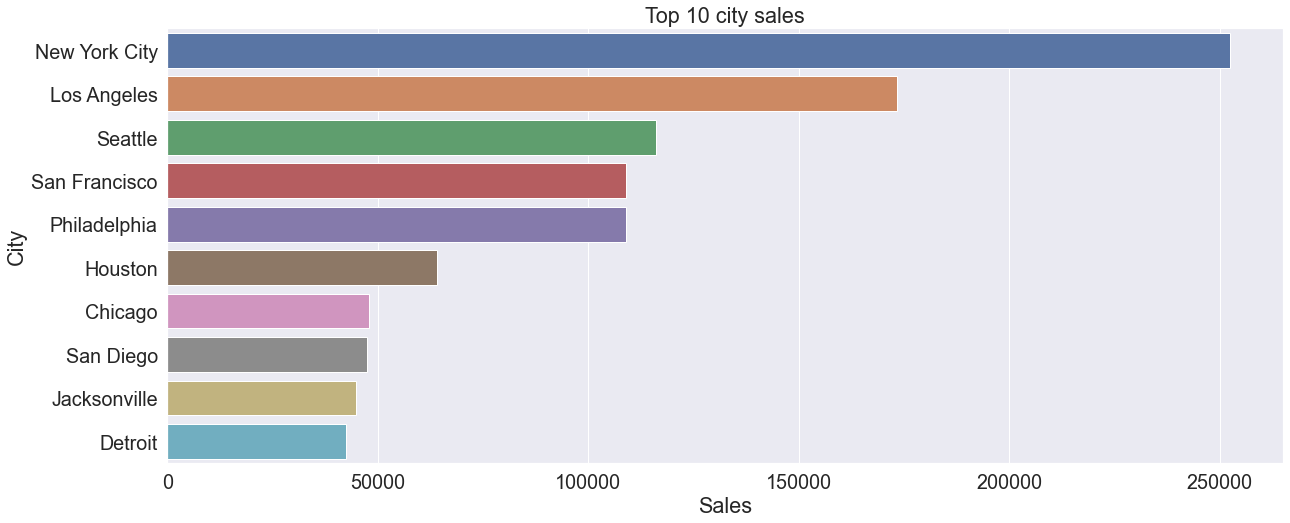

In [56]:
sns.set(font_scale=1.8)
plt.figure(figsize=(20,8));
plt.title('Top 10 city sales')
sns.set_style('darkgrid')
sns.barplot(x='Sales', y="City",data= city_sales)

# WHICH SEGMENT GENERATE THE SALES MOST ?

In [57]:
segment_sales= pd.DataFrame(sales.groupby(sales['Segment']).sum()['Sales']).reset_index()
segment_sales= segment_sales.nlargest(3,'Sales')
segment_sales.head(3)

,Segment,Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.247008e+05


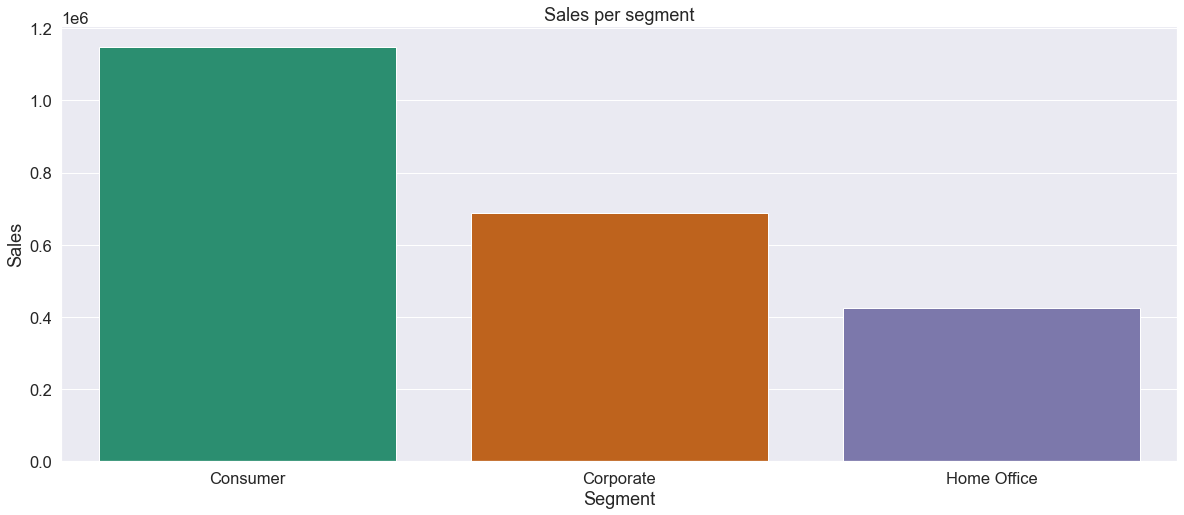

In [65]:
sns.set(font_scale=1.5)
sns.set_style("darkgrid")
plt.figure(figsize=(20,8));
plt.title('Sales per segment')
sns.barplot(x='Segment', y='Sales', data = segment_sales ,palette = 'Dark2');

* here consumer segment having more sales

# which region generates the sales most?

In [17]:
region_sales= pd.DataFrame(sales.groupby(sales['Region']).sum()['Sales']).reset_index()
region_sales=region_sales.nlargest(4,'Sales')
region_sales.head(4)

,Region,Sales
3,West,710219.6845
1,East,669518.7260
0,Central,492646.9132
2,South,389151.4590


<AxesSubplot:xlabel='Region', ylabel='Sales'>

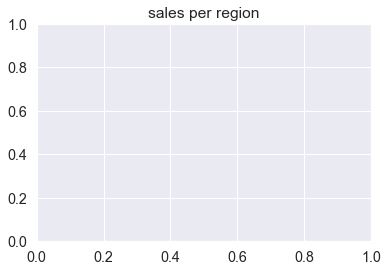

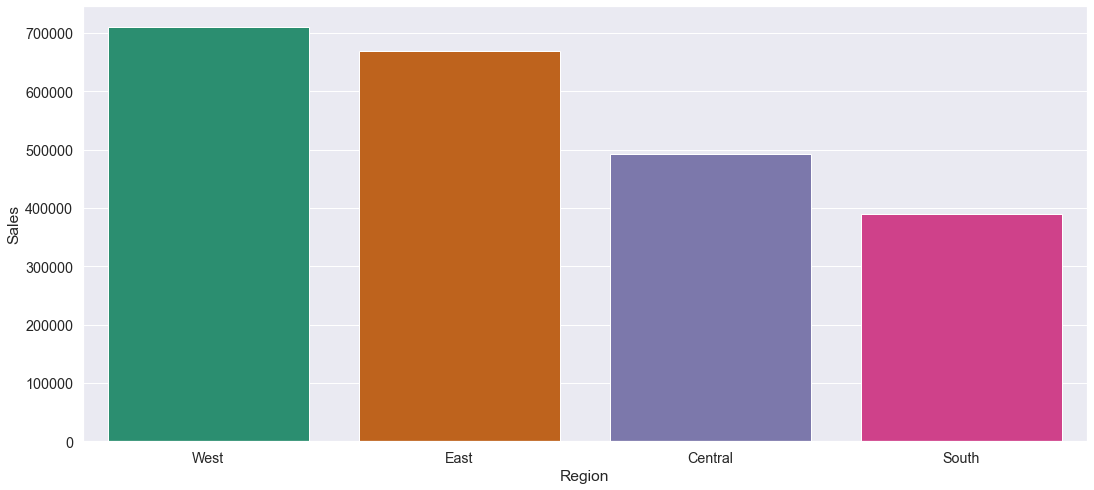

In [18]:
sns.set(font_scale=1.3)
sns.set_style('darkgrid')
plt.title('sales per region')
plt.figure(figsize=(18,8));
sns.barplot(x='Region',y='Sales',data=region_sales,palette='Dark2')

- Here **west** region has more sales.

# which category generates sales the most?

In [23]:
sales['Category'].value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

* there are 3 categories available

In [21]:
category_sales= pd.DataFrame(sales.groupby(sales['Category']).sum()['Sales']).reset_index()
category_sales=category_sales.nlargest(3,'Sales')
category_sales.head(3)

,Category,Sales
2,Technology,827455.8730
0,Furniture,728658.5757
1,Office Supplies,705422.3340


<AxesSubplot:xlabel='Category', ylabel='Sales'>

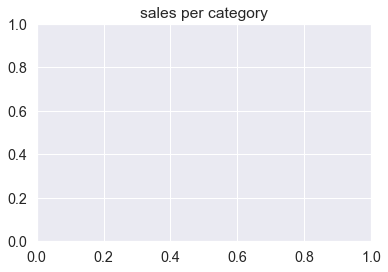

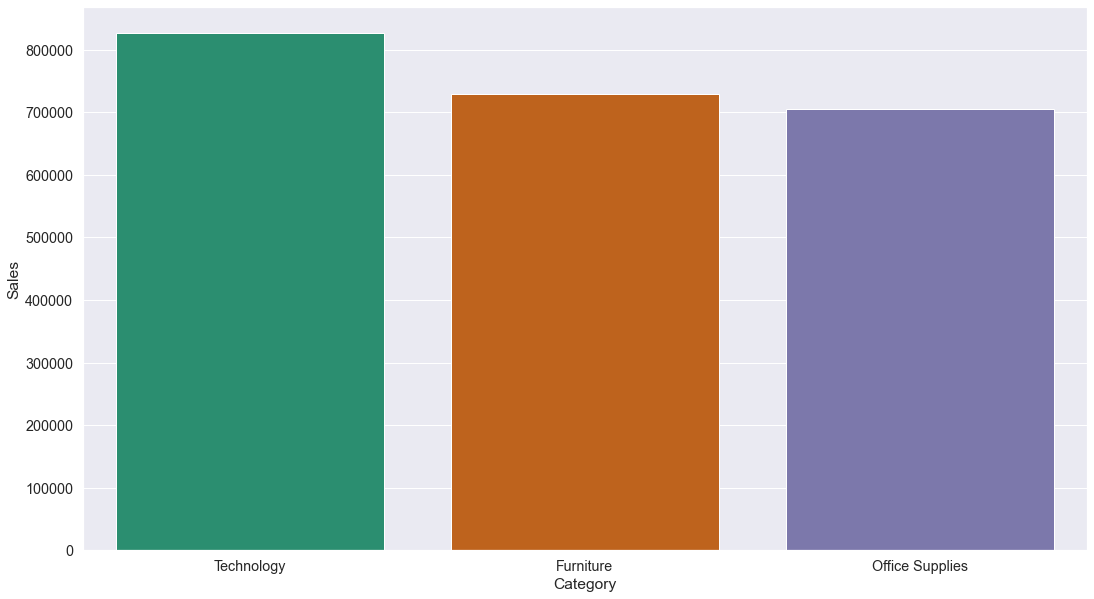

In [24]:
sns.set(font_scale=1.3)
sns.set_style('darkgrid')
plt.title('sales per category')
plt.figure(figsize=(18,10));
sns.barplot(x='Category',y='Sales',data=category_sales,palette='Dark2')

- Technology has more sales.

# which state generates the sales most?

In [25]:
state_sales= pd.DataFrame(sales.groupby(sales['State']).sum()['Sales']).reset_index()
state_sales=state_sales.nlargest(10,'Sales')
state_sales.head(10)

,State,Sales
3,California,446306.4635
30,New York,306361.1470
41,Texas,168572.5322
45,Washington,135206.8500
36,Pennsylvania,116276.6500
8,Florida,88436.5320
11,Illinois,79236.5170
20,Michigan,76136.0740
33,Ohio,75130.3500
44,Virginia,70636.7200


<AxesSubplot:xlabel='State', ylabel='Sales'>

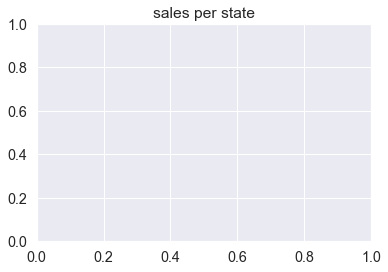

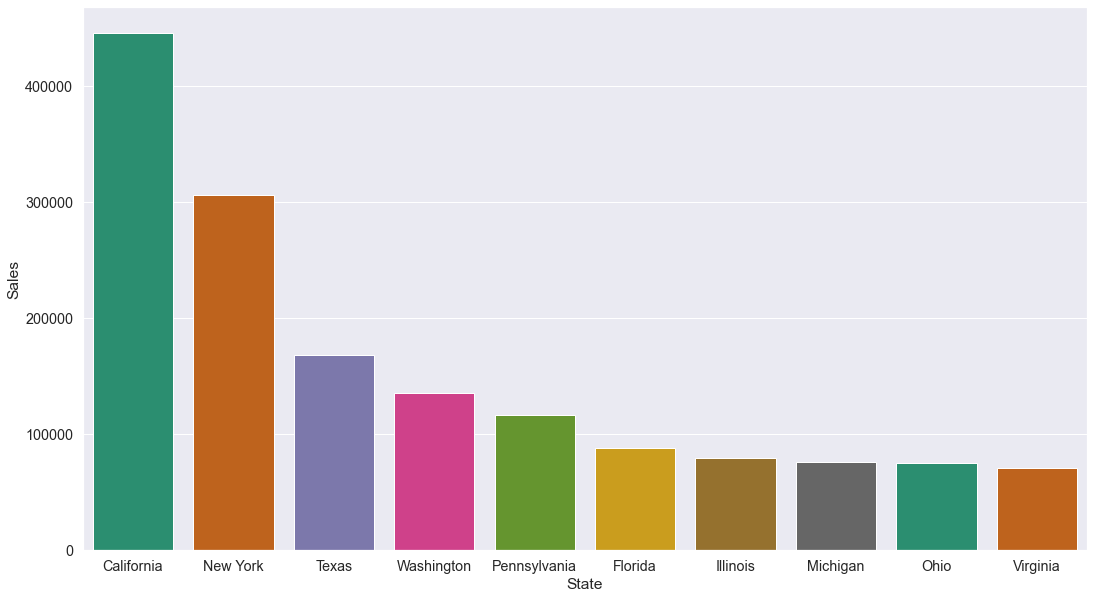

In [27]:
sns.set(font_scale=1.3)
sns.set_style('darkgrid')
plt.title('sales per state')
plt.figure(figsize=(18,10));
sns.barplot(x='State',y='Sales',data=state_sales,palette='Dark2')

- **california** state has highest number of sales.

# what is the top selling product?

In [32]:
product_sales= pd.DataFrame(sales.groupby(sales['Product Name']).sum()['Sales']).reset_index()
product_sales=product_sales.nlargest(10,'Sales')
product_sales.head(10)

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
804,Hewlett Packard LaserJet 3310 Copier,18839.686
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
682,GBC DocuBind P400 Electric Binding System,17965.068
812,High Speed Automatic Electric Letter Opener,17030.312


<AxesSubplot:xlabel='Sales', ylabel='Product Name'>

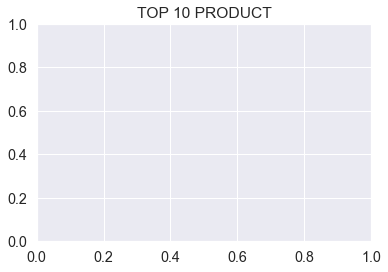

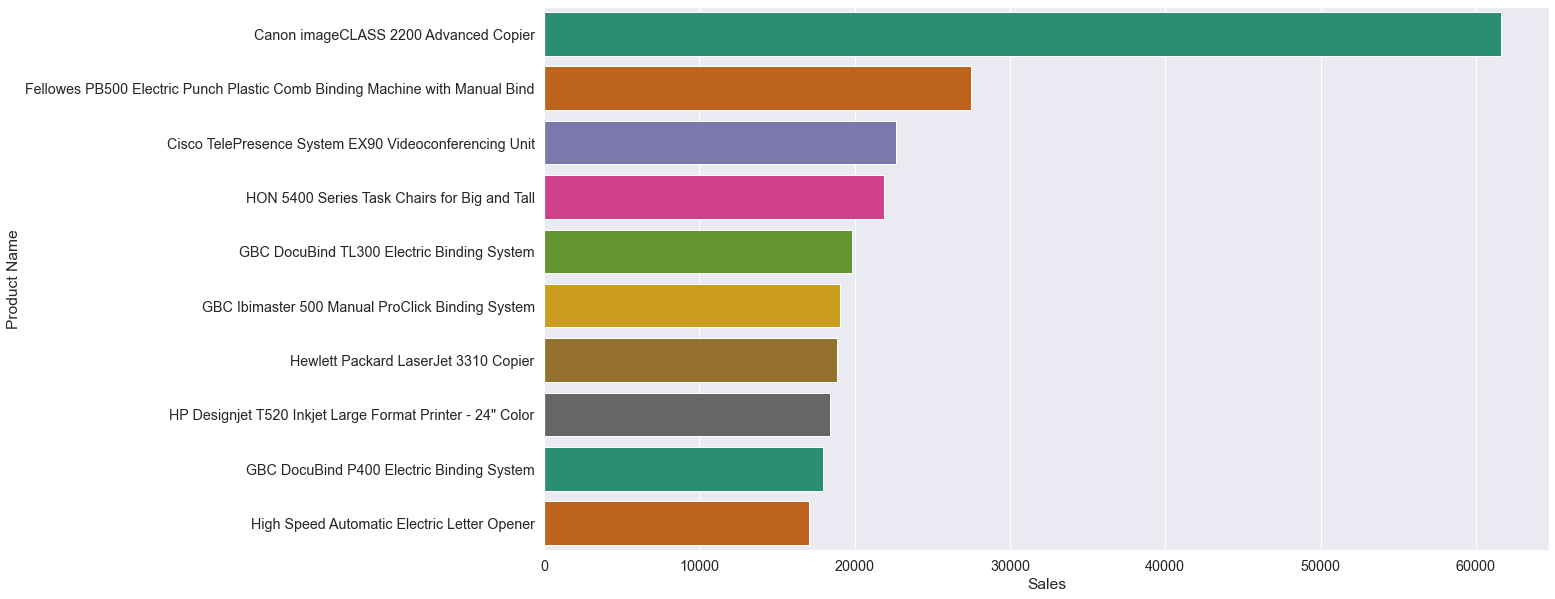

In [34]:
sns.set(font_scale=1.3)
sns.set_style('darkgrid')
plt.title('TOP 10 PRODUCT')
plt.figure(figsize=(18,10));
sns.barplot(y='Product Name',x='Sales',data=product_sales,palette='Dark2')

- **Canon imageCLASS 2200 Advanced Copier** product has the highest sales.

# sales over the 4 years?

In [25]:
Year_sales= pd.DataFrame(sales.groupby(sales['order_year']).sum()['Sales']).reset_index()
Year_sales= Year_sales.nlargest(4,'Sales')
Year_sales.head(4)

,order_year,Sales
3,2018,722052.0192
2,2017,600192.5500
0,2015,479856.2081
1,2016,459436.0054


<AxesSubplot:xlabel='order_year', ylabel='Sales'>

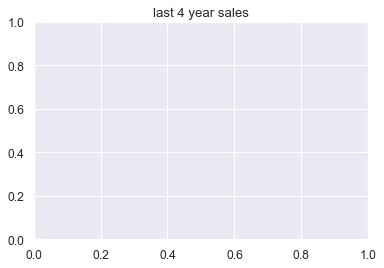

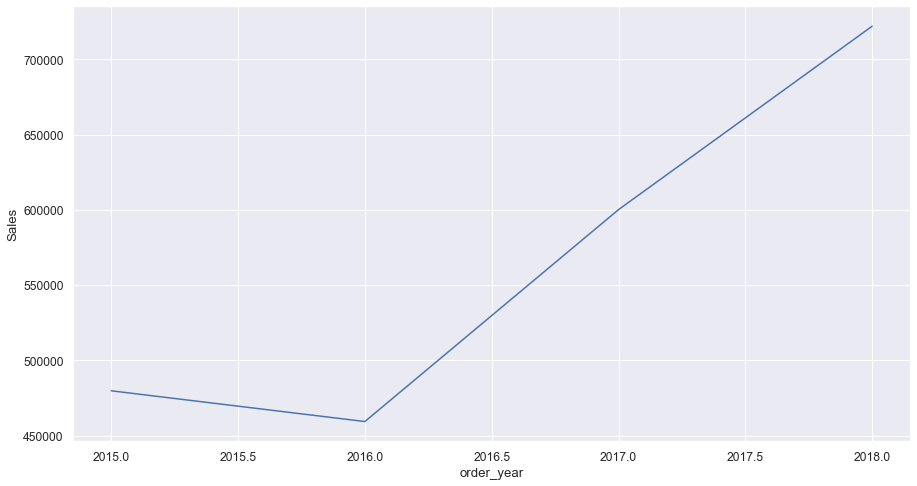

In [40]:
sns.set(font_scale=1.1)
sns.set_style('darkgrid')
plt.title('last 4 year sales')
plt.figure(figsize=(15,8));
sns.lineplot(y='Sales',x='order_year',data=Year_sales)

# TOP SELLING MONTHS OVER THE 4 YEARS?

In [41]:
Month_sales= pd.DataFrame(sales.groupby(sales['order_month']).sum()['Sales']).reset_index()
Month_sales= Month_sales.nlargest(12,'Sales')
Month_sales.head(12)

,order_month,Sales
9,November,268768.7885
2,December,246266.5152
11,September,245155.0671
7,March,212256.1344
1,August,207601.7939
10,October,183851.9562
8,May,166000.7467
5,July,159472.5865
4,January,155990.9154
0,April,142984.2481


<AxesSubplot:xlabel='order_month', ylabel='Sales'>

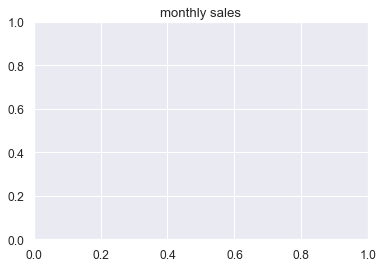

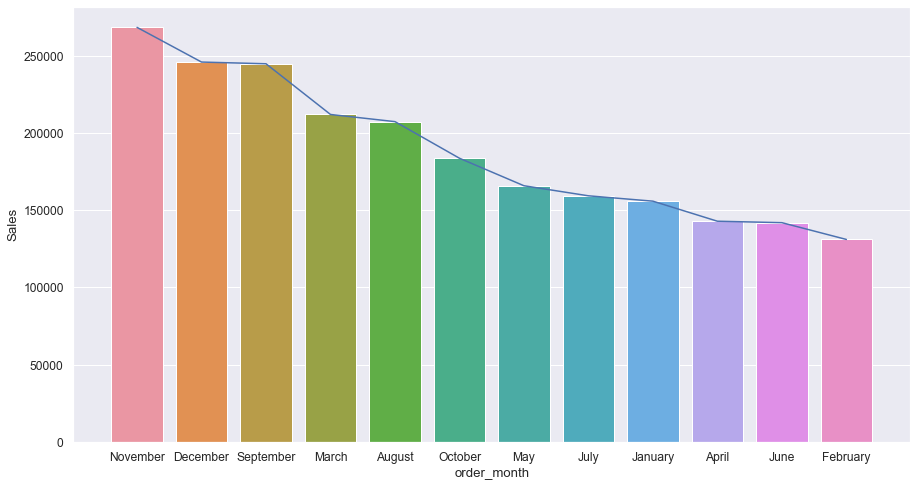

In [44]:
sns.set(font_scale=1.1)
sns.set_style('darkgrid')
plt.title('monthly sales')
plt.figure(figsize=(15,8));
sns.barplot(y='Sales',x='order_month',data=Month_sales)
sns.lineplot(y='Sales',x='order_month',data=Month_sales)

* In november month we found highest sales.